# <b>IFI 8420 - Final Project</b>
### Team 5
Mina Carbajal, Carmen Morales-Mier, Gaayathri Rayapaneni, Ignatius Jonathan Sugijono

<hr>

Introduction

<hr>

#### Installing all the requirement packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<hr>

#### Getting the State Energy Data System (SEDS) data provided by the U.S. Department of Energy, The Energy Information Administration (EIA) API
https://www.eia.gov/opendata/browser/seds
<br>The EIA browser API generates a url that has a built in offset value, as well as a request max limit of 5000. Since we want more than 5000 items, using Offest Pagination allows us to run a while loop that will grab the next 5000 items until the total set amount of items is reached. This is possible because the browser API also tells you how many total items your request generates.

In [6]:
# import requests

# api_key = 'v4Mpa3bxglq7V73FG1c9siXRib7Rtvsi6k17OSV5'
# offset = 0
# total = 2242317
# data = []

# while offset < total:
#     url = ('https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DC&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=US&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&sort[0][column]=seriesId&sort[0][direction]=desc&offset=' + str(offset) + '&length=5000')
#     response = requests.get(url, headers={'X-API-Key': api_key})
    
#     if response.status_code == 200:
#         data.extend(response.json()['response']['data'])
#         offset += 5000
#     else:
#         print('Error ' + str(response.status_code) + ': ' + response.text)
#         break

# print('Successfully retrieved ' + str(len(data)) + ' rows.')

In [16]:
# df = pd.DataFrame(paginated_data)
# df.head()

In [8]:
# df.to_csv('EIA_raw.csv')

In [10]:
EIA_raw_df = pd.read_csv('EIA_raw.csv')
EIA_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242317 entries, 0 to 2242316
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   period             int64  
 2   seriesId           object 
 3   seriesDescription  object 
 4   stateId            object 
 5   stateDescription   object 
 6   value              float64
 7   unit               object 
dtypes: float64(1), int64(2), object(5)
memory usage: 136.9+ MB


In [12]:
EIA_raw_df.head()

,Unnamed: 0,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
0,0,2021,ZWHDP,Heating degree days (HDD),VA,Virginia,3927.0,Days
1,1,2023,ZWHDP,Heating degree days (HDD),FL,Florida,428.0,Days
2,2,2023,ZWHDP,Heating degree days (HDD),DE,Delaware,3844.0,Days
3,3,2023,ZWHDP,Heating degree days (HDD),DC,District of Columbia,3272.0,Days
4,4,2023,ZWHDP,Heating degree days (HDD),AL,Alabama,2153.0,Days


#### Visualizing the SEDS data

In [15]:
# Simple regex filtering of the data to grab rows with renewable energy keywords only
renew_keywords = ['solar', 'wind', 'renewable', 'hydroelectric', 'geothermal', 'hydropower', 'total energy']
nonrenew_keywords = ['diesel', 'oil', 'gasoline', 'coal', 'fossil', 'hydrocarbon', 'nuclear', 'wood']
include_pattern = '|'.join(renew_keywords)
exclude_pattern = '|'.join(nonrenew_keywords)

EIA_renewable = EIA_raw_df[EIA_raw_df['seriesDescription'].str.contains(include_pattern, case=False, na=False) & ~EIA_raw_df['seriesDescription'].str.contains(exclude_pattern, case=False, na=False)]

In [16]:
EIA_renewable = EIA_renewable.drop(columns=['Unnamed: 0'])
EIA_renewable.reset_index(drop=True, inplace=True)
EIA_renewable.index = EIA_renewable.index + 1
EIA_renewable.head()

,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
1,2012,WYTXP,Wind energy total end-use net generation,NV,Nevada,0.0,Million kilowatthours
2,1967,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
3,1966,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
4,1965,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
5,1964,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours


In [17]:
# Solar Energy filtered dataframe
solar_df = EIA_renewable[EIA_renewable['seriesId'] == 'SOTGP']
state_vals = solar_df.groupby('stateId')['value'].sum()
state_vals_sorted = state_vals.sort_values(ascending=False)
state_vals_sorted.drop('US', inplace=True)

In [18]:
smallest_year = solar_df['period'].min()
largest_year = solar_df['period'].max()
print(smallest_year)
print(largest_year)

1960
2023


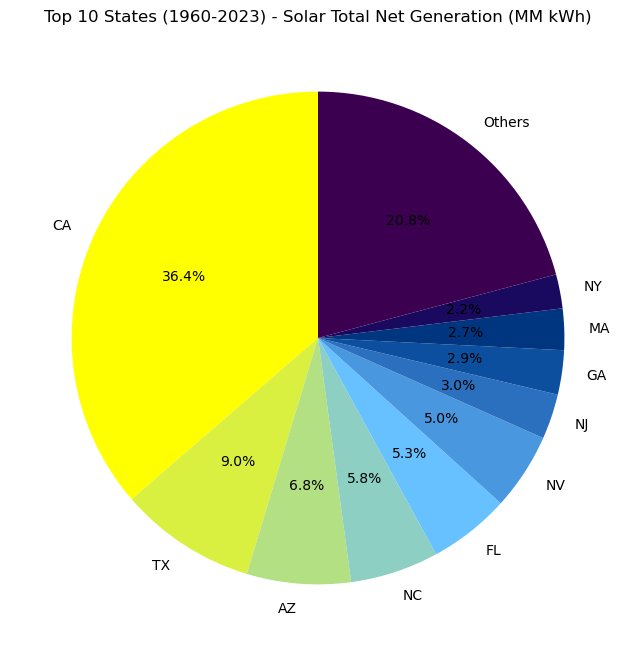

In [19]:
top_10 = state_vals_sorted.iloc[:10]
others = state_vals_sorted.iloc[10:].sum()
top_10['Others'] = others

plt.figure(figsize=(8, 8))
top_10.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, 
    labels=top_10.index, colors=['#FFFF00', '#D9F041', '#B3E082', '#8DD0C3', '#67C1FF', '#4998DF', '#2B70BF', '#0D4F9F', '#00357F', '#1A0A5F', '#3B004F']
)
plt.title('Top 10 States (1960-2023) - Solar Total Net Generation (MM kWh)')
plt.ylabel('')
plt.savefig('top_solar_states.png')
plt.show()

In [20]:
# Wind Energy filtered dataframe
wind_df = EIA_renewable[EIA_renewable['seriesId'] == 'WYTCP']
state_vals_2 = wind_df.groupby('stateId')['value'].sum()
state_vals_sorted_2 = state_vals_2.sort_values(ascending=False)
state_vals_sorted_2.drop('US', inplace=True)

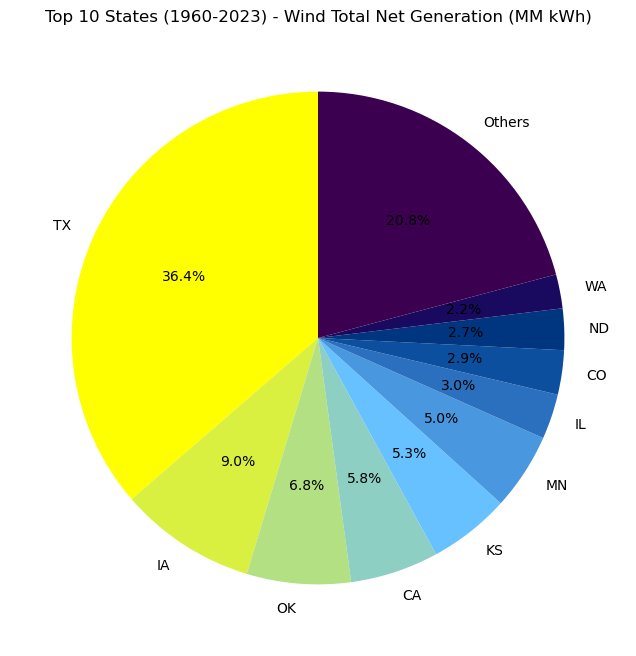

In [21]:
# Selecting the top 10 states after sorting by descending order
top_10_2 = state_vals_sorted_2.iloc[:10]
others_2 = state_vals_sorted_2.iloc[10:].sum()
top_10_2['Others'] = others_2

# Creating the graph
plt.figure(figsize=(8, 8))
top_10.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, 
    labels=top_10_2.index, colors=['#FFFF00', '#D9F041', '#B3E082', '#8DD0C3', '#67C1FF', '#4998DF', '#2B70BF', '#0D4F9F', '#00357F', '#1A0A5F', '#3B004F']
)
plt.title('Top 10 States (1960-2023) - Wind Total Net Generation (MM kWh)')
plt.ylabel('')
plt.savefig('top_wind_states.png')
plt.show()

In [22]:
pip install --upgrade geopandas

Note: you may need to restart the kernel to use updated packages.


In [30]:
import geopandas as gpd
import os

# Solar Energy Geopandas Graph
solar_df_2 = EIA_renewable[(EIA_renewable['seriesId'] == 'SOTGP') & 
                         (EIA_renewable['period'] >= 2013) & 
                         (EIA_renewable['period'] <= 2023)] # Grabbing values for this 10-year period

# Limiting to just the state IDs and the total value over 10 years
state_vals_2 = solar_df_2.groupby('stateId')['value'].sum()
state_vals_2.drop('US', inplace=True)

In [42]:
# Merging the TIGER/Line Shapefilea data from the US Census with our filtered EIA data
os.environ['GDAL_DATA'] = r"/tl_2023_us_state'"
gdf = gpd.read_file(os.getcwd()+'/tl_2023_us_state')
gdf = gdf.merge(state_vals_2, left_on='STUSPS', right_on='stateId', how='left')

ValueError: Found GDAL data directory at /opt/anaconda3/share/gdal but it does not appear to correctly contain GDAL data files

In [44]:
# Filtering out Alaska and Hawaii for a cleaner graph
continental_us = gdf[~gdf['STUSPS'].isin(['AK', 'HI'])]
# Creating the graph
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')
plot = continental_us.plot(column='value', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Energy (MM kWh)"})
ax.set_title('State Total Net Solar Generation\n2013-2023', fontdict={'fontsize': 17, 'fontweight': 'bold'})
plt.savefig('map_solar_states.png')
plt.show()

NameError: name 'gdf' is not defined

In [ ]:
# Wind Energy Geopandas Graph
wind_df = EIA_renewable[(EIA_renewable['seriesId'] == 'WYTCP') & 
                         (EIA_renewable['period'] >= 2013) & 
                         (EIA_renewable['period'] <= 2023)]

state_vals_3 = wind_df.groupby('stateId')['value'].sum()
state_vals_3.drop('US', inplace=True)

In [ ]:
os.environ['GDAL_DATA'] = r"C:\Users\Mina\anaconda3\Library\share\gdal"
gdf_2 = gpd.read_file(os.getcwd()+'/tl_2023_us_state')
gdf_2 = gdf_2.merge(state_vals_3, left_on='STUSPS', right_on='stateId', how='left')

In [ ]:
continental_us_2 = gdf_2[~gdf_2['STUSPS'].isin(['AK', 'HI'])]
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')
plot = continental_us_2.plot(column='value', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Energy (MM kWh)"})
ax.set_title('State Total Net Wind Generation\n2013-2023', fontdict={'fontsize': 17, 'fontweight': 'bold'})
plt.savefig('map_wind_states.png')
plt.show()

In [ ]:
# US Total Solar Graph
us_solar_df = EIA_renewable[EIA_renewable['seriesId'] == 'SOTGP']
us_solar_values = us_solar_df[us_solar_df['stateId'] == 'US']

plt.bar(us_solar_values['period'], us_solar_values['value'])

plt.xlabel('Year')
plt.ylabel('Energy (MM kWh)')
plt.title('United States - Solar Total Net Generation')
plt.savefig('us_solar_total.png', bbox_inches='tight')
plt.show()

In [ ]:
# US Total Wind Graph
us_wind_df = EIA_renewable[EIA_renewable['seriesId'] == 'WYTCP']
us_wind_values = us_wind_df[us_wind_df['stateId'] == 'US']

plt.bar(us_wind_values['period'], us_wind_values['value'])

plt.xlabel('Year')
plt.ylabel('Energy (MM kWh)')
plt.title('United States - Wind Total Net Generation')
plt.savefig('us_wind_total.png', bbox_inches='tight')
plt.show()

<hr>

#### Getting the Extreme Weather data

In [ ]:
pip install openpyxl

In [ ]:
import openpyxl
df_data = pd.read_excel("exWeather_PV_data.xlsx", sheet_name="data")
df_data.info()

In [ ]:
df_data.head()

In [ ]:
df_data.describe()

In [ ]:
# Show only columns with missing values
missing = df_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

#### Visualising the Extreme Weather data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_data[['Date', 'snow_value_mm', 'duration_minutes_storm', 'rain_value_mm', 'wind_speed_mean']].describe()

In [ ]:
ax =(df_data[['snow_value_mm', 'rain_value_mm']].mean().plot(kind='bar', title='Weather Impact on Photovoltaic Plant Performance (2018-2020)', ylabel='Mean (millimeters)', rot=45))
ax.set_xticklabels(['Snow', 'Rain'])
plt.savefig('snow_rain_impact.png', bbox_inches='tight')

In [ ]:
# Storm Duration
plt.figure(figsize=(10, 5))
plt.plot(df_data['Date'], df_data['duration_minutes_storm'], color='blue')
plt.title('Storm Duration Impact on Photovoltaic Plant Performance (2018-2020)')
plt.xlabel('Date')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('storm_duration_impact.png', bbox_inches='tight')
plt.show()

# Wind Speed
plt.figure(figsize=(10, 5))
plt.plot(df_data['Date'], df_data['wind_speed_mean'], color='green')
plt.title('Wind Speed Impact on Photovoltaic Plant Performance (2018-2020)')
plt.xlabel('Date')
plt.ylabel('Mean')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('wind_speed_impact.png', bbox_inches='tight')
plt.show()


In [ ]:
sns.heatmap(
    df_data[['snow_value_mm', 'duration_minutes_storm', 'rain_value_mm', 'wind_speed_mean']].corr(), 
    annot=True, 
    cmap='coolwarm',
    xticklabels=['Snow', 'Storm', 'Rain', 'Wind'], 
    yticklabels=['Snow', 'Storm', 'Rain', 'Wind']
)
plt.title('Correlation Matrix: Extreme Weather Features')
plt.savefig('impact_corr_matrix.png', bbox_inches='tight')
plt.show()


<hr>

#### Cleaning the SEDS data

In [46]:
# Load CSV
df_seds = pd.read_csv(r"EIA_raw.csv")
df_seds.head()

,Unnamed: 0,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
0,0,2021,ZWHDP,Heating degree days (HDD),VA,Virginia,3927.0,Days
1,1,2023,ZWHDP,Heating degree days (HDD),FL,Florida,428.0,Days
2,2,2023,ZWHDP,Heating degree days (HDD),DE,Delaware,3844.0,Days
3,3,2023,ZWHDP,Heating degree days (HDD),DC,District of Columbia,3272.0,Days
4,4,2023,ZWHDP,Heating degree days (HDD),AL,Alabama,2153.0,Days


In [47]:
df_seds.count()

Unnamed: 0           2242317
period               2242317
seriesId             2242317
seriesDescription    2242317
stateId              2242317
stateDescription     2242317
value                2242317
unit                 2242317
dtype: int64

In [48]:
print(df_seds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242317 entries, 0 to 2242316
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   period             int64  
 2   seriesId           object 
 3   seriesDescription  object 
 4   stateId            object 
 5   stateDescription   object 
 6   value              float64
 7   unit               object 
dtypes: float64(1), int64(2), object(5)
memory usage: 136.9+ MB
None


In [49]:
print(df_seds.isnull().sum())

Unnamed: 0           0
period               0
seriesId             0
seriesDescription    0
stateId              0
stateDescription     0
value                0
unit                 0
dtype: int64


In [54]:
for col in df_seds.select_dtypes(include='object').columns:
    print(f"{col}: {df_seds[col].nunique()} unique values")
    print(df_seds[col].unique()[:10])  # Print first 10 unique values
    print("-" * 40)

print(df_seds.describe())


seriesId: 886 unique values
['ZWHDP' 'ZWCDP' 'WZTCB' 'WZEIB' 'WYTXP' 'WYTXB' 'WYTCP' 'WYTCB' 'WYICP'
 'WYICB']
----------------------------------------
seriesDescription: 712 unique values
['Heating degree days (HDD)' 'Cooling degree days (CDD)'
 'Waste, excluding biodiesel, total consumption'
 'Waste, excluding biodiesel, consumed by the electric power sector'
 'Wind energy total end-use net generation'
 'Wind energy total end-use consumption'
 'Wind electricity total net generation' 'Wind energy total consumption'
 'Wind electricity net generation in the industrial sector'
 'Wind energy consumed by the industrial sector']
----------------------------------------
stateId: 52 unique values
['VA' 'FL' 'DE' 'DC' 'AL' 'AK' 'WI' 'CT' 'WA' 'VT']
----------------------------------------
stateDescription: 52 unique values
['Virginia' 'Florida' 'Delaware' 'District of Columbia' 'Alabama' 'Alaska'
 'Wisconsin' 'Connecticut' 'Washington' 'Vermont']
----------------------------------------
unit: 

In [56]:
# Filter to keep only solar and wind energy
df_seds = df_seds[df_seds['seriesId'].isin(['SOTGP', 'WYTCP'])]

# Remove rows where net power generation is zero
df_seds = df_seds[df_seds['value'] != 0]

# Drop index column if it's just a leftover
df_seds = df_seds.drop(columns=['Unnamed: 0'])

# Drop rows where target is missing
df_seds = df_seds[df_seds['value'].notna()]

df_seds[['seriesId', 'seriesDescription', 'stateId', 'stateDescription', 'unit']] = df_seds[['seriesId', 'seriesDescription', 'stateId', 'stateDescription', 'unit']].astype('category')

# Show columns for sanity check
df_seds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1903 entries, 19864 to 310751
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   period             1903 non-null   int64   
 1   seriesId           1903 non-null   category
 2   seriesDescription  1903 non-null   category
 3   stateId            1903 non-null   category
 4   stateDescription   1903 non-null   category
 5   value              1903 non-null   float64 
 6   unit               1903 non-null   category
dtypes: category(5), float64(1), int64(1)
memory usage: 59.2 KB


In [58]:
# Splitting the solar and wind value columns
df_seds['value_wind'] = df_seds.apply(lambda row: row['value'] if row['seriesId'] == 'WYTCP' else None, axis=1)
df_seds['value_solar'] = df_seds.apply(lambda row: row['value'] if row['seriesId'] == 'SOTGP' else None, axis=1)

df_seds.drop(columns=['value'], inplace=True)
df_seds

,period,seriesId,seriesDescription,stateId,stateDescription,unit,value_wind,value_solar
19864,2012,WYTCP,Wind electricity total net generation,UT,Utah,Million kilowatthours,704.0,NaN
19866,2014,WYTCP,Wind electricity total net generation,TX,Texas,Million kilowatthours,40005.0,NaN
19867,2014,WYTCP,Wind electricity total net generation,OH,Ohio,Million kilowatthours,1153.0,NaN
19868,2014,WYTCP,Wind electricity total net generation,WA,Washington,Million kilowatthours,7268.0,NaN
19869,2014,WYTCP,Wind electricity total net generation,SD,South Dakota,Million kilowatthours,2336.0,NaN
...,...,...,...,...,...,...,...,...
310747,2022,SOTGP,Solar thermal and photovoltaic electricity tot...,CO,Colorado,Million kilowatthours,NaN,3772.0
310748,2022,SOTGP,Solar thermal and photovoltaic electricity tot...,CA,California,Million kilowatthours,NaN,62910.0
310749,2022,SOTGP,Solar thermal and photovoltaic electricity tot...,CT,Connecticut,Million kilowatthours,NaN,1470.0
310750,2022,SOTGP,Solar thermal and photovoltaic electricity tot...,HI,Hawaii,Million kilowatthours,NaN,1882.0


#### Cleaning the Extreme Weather data

In [61]:
df_extreme = pd.read_excel("exWeather_PV_data.xlsx", sheet_name="data")

# Drop any row with all 0s
df_extreme = df_extreme[['Date', 'NOAAClimRegion', 'PR', 'snow_value_mm', 'duration_minutes_storm', 'rain_value_mm', 'wind_speed_mean']]
df_extreme = df_extreme[(df_extreme != 0).any(axis=1)]

# Cleaning column types
df_extreme['NOAAClimRegion'] = df_extreme['NOAAClimRegion'].astype('category')
df_extreme['duration_minutes_storm'] = df_extreme['duration_minutes_storm'].astype(float)

df_extreme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51504 entries, 0 to 51503
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    51504 non-null  datetime64[ns]
 1   NOAAClimRegion          51504 non-null  category      
 2   PR                      49940 non-null  float64       
 3   snow_value_mm           45682 non-null  float64       
 4   duration_minutes_storm  51504 non-null  float64       
 5   rain_value_mm           40703 non-null  float64       
 6   wind_speed_mean         40337 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(5)
memory usage: 2.4 MB


In [62]:
min_date = df_extreme['Date'].min()
max_date = df_extreme['Date'].max()

print(min_date)
print(max_date)

2018-02-22 00:00:00
2020-03-01 00:00:00


In [63]:
# Filter rows for the years 2018 and 2019, since 2020 only has 3 months of data
df_extreme = df_extreme[df_extreme['Date'].dt.year.isin([2018, 2019])]
df_extreme

,Date,NOAAClimRegion,PR,snow_value_mm,duration_minutes_storm,rain_value_mm,wind_speed_mean
0,2018-04-01,West,0.825922,0.0,0.0,0.0,4.482719
1,2018-04-02,West,0.788456,0.0,0.0,0.0,6.481521
2,2018-04-03,West,0.773524,0.0,0.0,0.0,5.166083
3,2018-04-04,West,0.798637,0.0,0.0,0.0,3.506312
4,2018-04-05,West,0.787212,0.0,0.0,0.0,5.429458
...,...,...,...,...,...,...,...
51499,2019-07-27,Southeast,0.721850,0.0,0.0,0.0,1.197477
51500,2019-07-28,Southeast,0.727255,0.0,0.0,0.0,0.766352
51501,2019-07-29,Southeast,0.717232,0.0,0.0,0.0,1.126704
51502,2019-07-30,Southeast,0.702711,0.0,0.0,0.0,1.262544


In [64]:
df_extreme.describe()

,Date,PR,snow_value_mm,duration_minutes_storm,rain_value_mm,wind_speed_mean
count,50772,49237.000000,45341.000000,50772.000000,40703.000000,39617.000000
mean,2018-11-18 20:30:17.442684928,0.626429,1.209992,0.414638,2.302144,3.692087
min,2018-02-22 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-08-19 00:00:00,0.599696,0.000000,0.000000,0.000000,1.182958
50%,2018-11-16 00:00:00,0.754059,0.000000,0.000000,0.000000,1.955213
75%,2019-02-11 00:00:00,0.805333,0.000000,0.000000,0.235467,3.465517
max,2019-12-31 00:00:00,1.199583,275.737309,1440.000000,278.525241,2672.129065
std,NaN,0.297530,10.479230,19.050660,8.147026,34.190996


#### Combining the two datasets and preparing for model training

In [66]:
# Create a dictionary with climate regions as keys and lists of states as values
region_to_states = {
    "Northeast": [
        "Connecticut", "Delaware", "Maine", "Maryland", "Massachusetts", 
        "New Hampshire", "New Jersey", "New York", "Pennsylvania", 
        "Rhode Island", "Vermont"
    ],
    "Upper Midwest": ["Iowa", "Michigan", "Minnesota", "Wisconsin"],
    "Ohio Valley": [
        "Illinois", "Indiana", "Kentucky", "Missouri", "Ohio", 
        "Tennessee", "West Virginia"
    ],
    "Southeast": [
        "Alabama", "Florida", "Georgia", "North Carolina", 
        "South Carolina", "Virginia"
    ],
    "South": ["Arkansas", "Kansas", "Louisiana", "Mississippi", "Oklahoma", "Texas"],
    "Southwest": ["Arizona", "Colorado", "New Mexico", "Utah"],
    "Northwest": ["Idaho", "Oregon", "Washington"],
    "West": ["California", "Nevada"]
}

state_to_region = {}
for region, states in region_to_states.items():
    for state in states:
        state_to_region[state] = region

# Getting rows with matching years
df_extreme['year'] = pd.to_datetime(df_extreme['Date']).dt.year

# Mapping climate regions and combining based on year + region
df_seds['climate_region'] = df_seds['stateDescription'].map(state_to_region)
df_combined = pd.merge(df_extreme, df_seds, left_on=['year', 'NOAAClimRegion'], 
                       right_on=['period', 'climate_region'], how='left')

df_combined = df_combined.drop(columns=['period', 'stateDescription', 'climate_region'])
df_combined

,Date,NOAAClimRegion,PR,snow_value_mm,duration_minutes_storm,rain_value_mm,wind_speed_mean,year,seriesId,seriesDescription,stateId,unit,value_wind,value_solar
0,2018-04-01,West,0.825922,0.0,0.0,0.0,4.482719,2018,WYTCP,Wind electricity total net generation,NV,Million kilowatthours,312.0,NaN
1,2018-04-01,West,0.825922,0.0,0.0,0.0,4.482719,2018,WYTCP,Wind electricity total net generation,CA,Million kilowatthours,14024.0,NaN
2,2018-04-01,West,0.825922,0.0,0.0,0.0,4.482719,2018,SOTGP,Solar thermal and photovoltaic electricity tot...,NV,Million kilowatthours,NaN,5215.0
3,2018-04-01,West,0.825922,0.0,0.0,0.0,4.482719,2018,SOTGP,Solar thermal and photovoltaic electricity tot...,CA,Million kilowatthours,NaN,39904.0
4,2018-04-02,West,0.788456,0.0,0.0,0.0,6.481521,2018,WYTCP,Wind electricity total net generation,NV,Million kilowatthours,312.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391462,2019-07-31,Southeast,0.740452,0.0,0.0,0.0,0.861987,2019,SOTGP,Solar thermal and photovoltaic electricity tot...,AL,Million kilowatthours,NaN,399.0
391463,2019-07-31,Southeast,0.740452,0.0,0.0,0.0,0.861987,2019,SOTGP,Solar thermal and photovoltaic electricity tot...,SC,Million kilowatthours,NaN,1187.0
391464,2019-07-31,Southeast,0.740452,0.0,0.0,0.0,0.861987,2019,SOTGP,Solar thermal and photovoltaic electricity tot...,VA,Million kilowatthours,NaN,1081.0
391465,2019-07-31,Southeast,0.740452,0.0,0.0,0.0,0.861987,2019,SOTGP,Solar thermal and photovoltaic electricity tot...,NC,Million kilowatthours,NaN,7725.0


In [102]:
wind_combined = df_combined[df_combined['seriesId'] == 'WYTCP']
wind_combined = wind_combined.drop(columns=['value_solar']).dropna()
solar_combined = df_combined[df_combined['seriesId'] == 'SOTGP']
solar_combined = solar_combined.drop(columns=['value_wind']).dropna()

In [104]:
from sklearn.model_selection import train_test_split

# Wind data splitting
df_wind = wind_combined[wind_combined['seriesId'] == 'WYTCP']
X_wind = df_wind[['PR', 'snow_value_mm', 'rain_value_mm', 'wind_speed_mean']]
y_wind = df_wind['value_wind']

# Solar data splitting
df_solar = solar_combined[solar_combined['seriesId'] == 'SOTGP']
X_solar = df_solar[['PR', 'snow_value_mm', 'rain_value_mm', 'wind_speed_mean']]
y_solar = df_solar['value_solar']

X_wind_train, X_wind_test, y_wind_train, y_wind_test = train_test_split(X_wind, y_wind, test_size=0.2, random_state=42)
X_solar_train, X_solar_test, y_solar_train, y_solar_test = train_test_split(X_solar, y_solar, test_size=0.2, random_state=42)

<hr>

#### Model: Multiple Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression

Wind Model Coefficients: [-2211.72851814    -8.80634868   -62.04499233     5.68792015]
Wind Model Intercept: 7465.219369106189


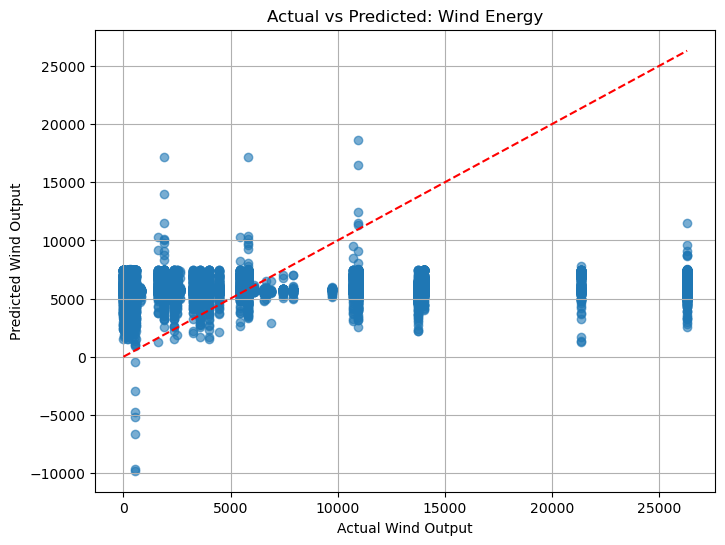

In [110]:
wind_model = LinearRegression()
wind_model.fit(X_wind_train, y_wind_train)

#Evaluate
print("Wind Model Coefficients:", wind_model.coef_)
print("Wind Model Intercept:", wind_model.intercept_)

#Predict
y_wind_pred = wind_model.predict(X_wind_test)

#Visual Plot Actual vs Predicted Wind Model
plt.figure(figsize=(8, 6))
plt.scatter(y_wind_test, y_wind_pred, alpha=0.6)
plt.plot([y_wind_test.min(), y_wind_test.max()], [y_wind_test.min(), y_wind_test.max()], 'r--')
plt.xlabel('Actual Wind Output')
plt.ylabel('Predicted Wind Output')
plt.title('Actual vs Predicted: Wind Energy')
plt.grid(True)
plt.show()

In [116]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [140]:
print('R² Score:', r2_score(y_wind_test, y_wind_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_wind_test, y_wind_pred))  
print('Mean Squared Error (MSE):', mean_squared_error(y_wind_test, y_wind_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_wind_test, y_wind_pred)))

R² Score: 0.009097935148480563
Mean Absolute Error (MAE): 6102.674629106241
Mean Squared Error (MSE): 51353070.83997182
Root Mean Squared Error (RMSE): 7166.105695562396


The linear regression model for predicting wind energy output was evaluated using standard performance metrics. The model resulted in an R² score of 0.0091, indicating that less than 1% of the variance in wind energy output is explained by the features used. The MAE was 6102.67, meaning the model’s predictions were off by over 6,100 units on average. The RMSE was 7166.11, highlighting a substantial deviation between predicted and actual values. These high error values, along with the low R², suggest that the linear model is not effectively capturing patterns in the data.

While linear regression makes it easy to interpret the influence of individual features through its coefficients, in this case, those coefficients did not strongly predict wind output, as shown by the low model accuracy and poor prediction performance. There was minimal difference between training and testing error, indicating the model likely underfit that data rather than overfit it.

Solar Model Coefficients: [ 8.45039826e+03 -2.53319252e+01 -1.35374010e+02  4.31043138e+00]
Solar Model Intercept: 3018.4519283896243


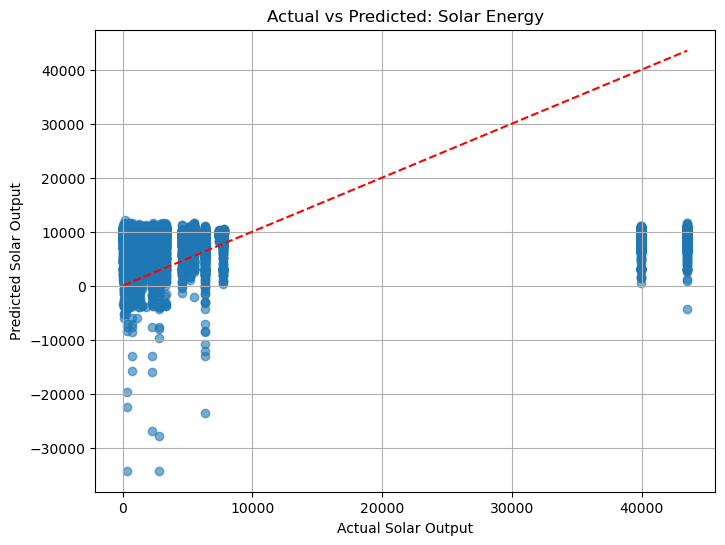

In [112]:
solar_model = LinearRegression()
solar_model.fit(X_solar_train, y_solar_train)

#Evaluate
print("Solar Model Coefficients:", solar_model.coef_)
print("Solar Model Intercept:", solar_model.intercept_)

#Predict
y_solar_pred = solar_model.predict(X_solar_test)

#Visual Plot Actual vs Predicted Solar Model
plt.figure(figsize=(8, 6))
plt.scatter(y_solar_test, y_solar_pred, alpha=0.6)
plt.plot([y_solar_test.min(), y_solar_test.max()], [y_solar_test.min(), y_solar_test.max()], 'r--')
plt.xlabel('Actual Solar Output')
plt.ylabel('Predicted Solar Output')
plt.title('Actual vs Predicted: Solar Energy')
plt.grid(True)
plt.show()

In [126]:
print('R² Score:', r2_score(y_solar_test, y_solar_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_solar_test, y_solar_pred))  
print('Mean Squared Error (MSE):', mean_squared_error(y_solar_test, y_solar_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_solar_test, y_solar_pred)))

R² Score: 0.036619898602537115
Mean Absolute Error (MAE): 10079.011776336774
Mean Squared Error (MSE): 195908212.09386778
Root Mean Squared Error (RMSE): 13996.721476612578


The linear regression for predicting solar energy output showed slightly better performance than the wind model, but still had limited predictive power. The R² score was 0.0366, indicating that only about 3.7% of the variation in solar output is explained by the model’s features. The MAE was 10079.01, meaning that the model's predictions were off by over 10,000 units on average. The RMSE was 13,996.72, indicating that the model's predictions tend to deviate significantly from the actual values. 

Although the solar model outperformed the wind model in terms of R² and overall error, its predictive accuracy remains very low. This suggests that the linear model still struggles to capture the complexity of solar energy output. Like the wind model, linear regression offers the benefit of being straightforward and easy to interpret, particularly when examining the influence of individual features. However, the low R² and substantial prediction errors suggest that the model is underfitting the data, likely due to its inability to represent more complex patterns and relationships.

#### Model: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


#### Model: Support Vector Regression

In [ ]:
from sklearn.svm import SVR
